<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**Unsupervised Analysis Project | Mobile Applications Download Behavior**</h2>

Team 8 || Machine Learning || MBAN-2

Ambre Cherkaoui<br>
Cassius Hall<br>
Yu- Chun Lee<br>
Sneha Ramu<br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


**Purpose of this script**</br>
To compile a study on consumers' downloading behavior. Additionally, determining which marketing niche is most likely to use specific applications.


**Executive Summary**</br>
We chose tech savvy and resource users as our primary targets since they have a stronger correlation with the demography variable. In the long run, we should concentrate on those who are familiar with technology and seek information. They would stay up with the latest developments.




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1> Prepare Data Set </h1>
<h2>Import and Load Data Set</h2>

In [138]:
########################################
# importing packages
########################################

import matplotlib.pyplot as plt                         # fundamental data visualization
import numpy as np                                      # mathematical essentials
import pandas as pd                                     # data science essentials 
import seaborn as sns                                   # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing import StandardScaler        # standard scaler
from sklearn.decomposition import PCA                   # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering


########################################
# loading data and setting display options
########################################

survey_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Declare User - Defined Functions</h2>

In [139]:
########################################
# scree_plot
########################################

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################

def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**a) Check information about non-missing values and data types for each column**

In [140]:
# checking information about each column
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**b) Display the first five rows of survey_df.**

In [141]:
# displaying first five rows of the dataset
survey_df.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Categorizing features</h1> </br>
The data was divided into four categories: demographic, non-demographic, psychometric, and applications. These categories are used to categorize customers based on how they use apps, the device or devices with which they engage, consumer purchasing power, and the type of entertainment they appreciate/love.

In [142]:
#Categorize survey question feature
demographic_q = survey_df[['q1','q49','q54','q55','q57','q48','q56']] #leave at the final analysis

psychometric_q = survey_df[['q24r1','q24r2','q24r3','q24r4','q24r5','q24r6','q24r7',
                            'q24r8','q24r9','q24r10','q24r11','q24r12','q25r1','q25r2',
                            'q25r3','q25r4','q25r5','q25r6','q25r7','q25r8','q25r9',
                            'q25r10','q25r11','q25r12','q26r3','q26r4','q26r5',
                            'q26r6','q26r7','q26r8','q26r9','q26r10','q26r11',
                            'q26r12','q26r13','q26r14','q26r15','q26r16','q26r17',
                            'q26r18']]

non_demographic_q = survey_df[['q2r1','q2r2','q2r3','q2r4','q2r5','q2r6','q2r7','q2r8','q2r9',
                    'q2r10','q4r1','q4r2','q4r3','q4r4','q4r5','q4r6','q4r7','q4r8',
                    'q4r9','q4r10','q4r11']]

app_q = survey_df[['q11','q12','q13r1','q13r2','q13r3','q13r4','q13r5','q13r6',
                   'q13r7','q13r8','q13r9','q13r10','q13r11','q13r12']]


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Categorical Data Analysis</h1><br>
<h2>Psychometric Features</h2><br>
<h3>Apply Unsupervised Scaler Function</h3><br>

In [143]:
# applying the unsupervised_scaler function
psychometric_scaled = unsupervised_scaler(df = psychometric_q)

# checking pre- and post-scaling variance
print(np.var(psychometric_q), '\n\n')
print(np.var(psychometric_scaled))

q24r1     2.370016
q24r2     0.917307
q24r3     1.972626
q24r4     2.457613
q24r5     2.089064
q24r6     1.096755
q24r7     1.214049
q24r8     1.079791
q24r9     2.602488
q24r10    1.191352
q24r11    1.634449
q24r12    1.062101
q25r1     1.251600
q25r2     1.494538
q25r3     1.175736
q25r4     1.214625
q25r5     1.364530
q25r6     2.392788
q25r7     1.108724
q25r8     1.536148
q25r9     1.247248
q25r10    1.296109
q25r11    1.364405
q25r12    1.770293
q26r3     1.338930
q26r4     1.980670
q26r5     1.755799
q26r6     2.008316
q26r7     2.158827
q26r8     2.144740
q26r9     1.834877
q26r10    1.858299
q26r11    3.082074
q26r12    2.017210
q26r13    2.343706
q26r14    2.008552
q26r15    1.408040
q26r16    2.059268
q26r17    1.634263
q26r18    2.269049
dtype: float64 


q24r1     1.0
q24r2     1.0
q24r3     1.0
q24r4     1.0
q24r5     1.0
q24r6     1.0
q24r7     1.0
q24r8     1.0
q24r9     1.0
q24r10    1.0
q24r11    1.0
q24r12    1.0
q25r1     1.0
q25r2     1.0
q25r3     1.0
q25r4     1.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />




<h3>PCA with No Limit</h3>

Instantiate PCA with no limit and call scree-plot on PCA object

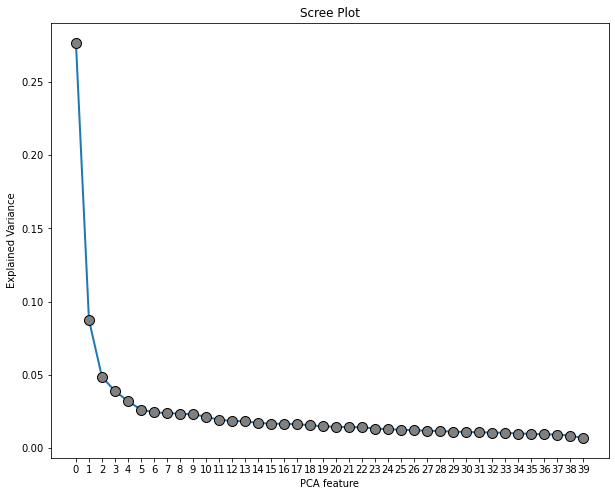

In [144]:
# instantiating a PCA object with no limit to principal components
pca_psy = PCA(n_components = None,
          random_state = 219)


# fitting and transforming the scaled data
psychometric_pca = pca_psy.fit_transform(psychometric_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_psy)

We were able to locate our elbow at number three, resulting in three persona describing how they use apps. For non-demographic, and application data, the same procedure was employed.</br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>PCA with Limit</h3>

In [145]:
# instantiate a PCA object with limit to principal components
pca_psy = PCA(n_components = 3,
            random_state = 219)


# fitting and transforming the scaled data
psychometric_pca = pca_psy.fit_transform(psychometric_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", psychometric_scaled.shape)
print("PCA shape     :", psychometric_pca.shape)

Original shape: (1552, 40)
PCA shape     : (1552, 3)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Evaluating PCA Algorithms</h3>

**a)Print each explained variance ratio**

In [146]:
#fitting and Transforming the scaled data
survey_pca_psy = pca_psy.fit_transform(psychometric_scaled)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca_psy.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.277
PC 2: 0.087
PC 3: 0.049


In [147]:
# printing the sum of all explained variance ratios
print(pca_psy.explained_variance_ratio_.sum())

0.41284642031859997


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**b)Call scree-plot on PCA object with limit**

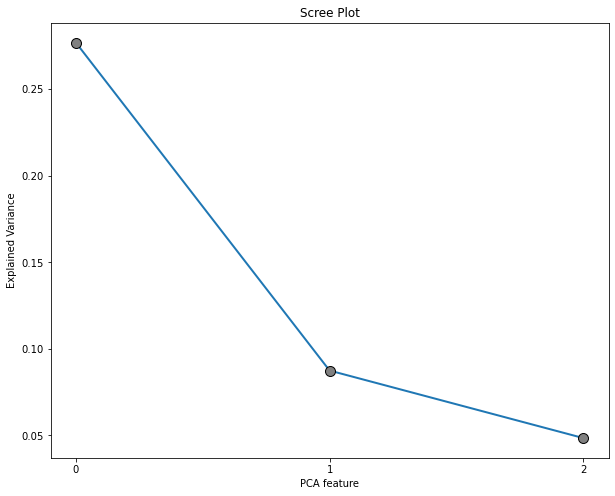

In [148]:
# calling the scree_plot function
scree_plot(pca_psy)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Interpreting Principal Components and Persona Development</h3>
 
**a)Analyze PC Factor Loadings**

In [149]:
# transposing pca components
psychometric_factor_loadings = pd.DataFrame(np.transpose(pca_psy.components_.round(decimals = 2)))


# naming rows as original features
psychometric_factor_loadings = psychometric_factor_loadings.set_index(psychometric_q.columns)


# checking the result
print(psychometric_factor_loadings)

           0     1     2
q24r1   0.09 -0.16 -0.08
q24r2   0.12  0.22  0.14
q24r3   0.13  0.07  0.22
q24r4   0.04 -0.23 -0.29
q24r5   0.15 -0.07  0.15
q24r6   0.13  0.18  0.03
q24r7   0.17  0.17  0.12
q24r8   0.15  0.22  0.17
q24r9   0.04 -0.28 -0.31
q24r10  0.18  0.18  0.14
q24r11  0.18  0.16  0.04
q24r12  0.16  0.24  0.08
q25r1   0.19  0.11 -0.24
q25r2   0.19  0.06 -0.22
q25r3   0.18  0.11 -0.16
q25r4   0.18  0.14 -0.26
q25r5   0.20  0.11 -0.08
q25r6   0.07 -0.33 -0.06
q25r7   0.15  0.14 -0.21
q25r8   0.17  0.05 -0.23
q25r9   0.16  0.12 -0.18
q25r10  0.15  0.15 -0.14
q25r11  0.17  0.08 -0.27
q25r12  0.11 -0.09 -0.22
q26r3   0.11  0.02  0.05
q26r4   0.18 -0.18  0.08
q26r5   0.16 -0.17  0.12
q26r6   0.17 -0.09  0.12
q26r7   0.19 -0.18  0.00
q26r8   0.19 -0.13  0.19
q26r9   0.16 -0.02  0.13
q26r10  0.20 -0.05  0.17
q26r11  0.11 -0.21 -0.03
q26r12  0.18 -0.11  0.08
q26r13  0.13 -0.19  0.04
q26r14  0.18 -0.21  0.09
q26r15  0.18 -0.02  0.04
q26r16  0.16 -0.20  0.10
q26r17  0.18 -0.05  0.15


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**b)Name each principal component based on its factor loading**
 
To create our persona, we gathered the strongest negative and positive correlations.</br>

(i) Tech Savvy : This person appreciates technology and its benefits. Using it as a means of contact with family and friends. They're also the first ones to download apps and teach how to use them to others. They are also observed utilizing devices other than their phones, and they are buyers of what is trendy and what isn't, and they often purchase premium brand items.</br>

(ii) Resource USer : An individual who is knowledgeable. When it comes to purchasing technology or electronic devices, people frequently seek their assistance. They believe that today's internet  and social media sites provide too much information. Because the internet allows this individual to avoid seeing or conversing with family and friends.Their child(ren) has no bearing on their apps; they keep track of how they spend their money. They are unaffected by what is popular and what isn't. They purchase brands that are representative of their personal style. We've coined the term "resource user" to describe someone who uses an application for a specific reason or necessity, rather than just for fun.</br>

(iii) Conformist : Last but not least, this is  person who adores buying new gadgets and equipment. Although, they believe there is no such thing as too much technology in everyday life. They believe there isn't enough information on the internet and social media sites like Facebook today. They don't see themselves as opinion leaders: "I wouldn't say I adore standing out from the crowd." They don't like taking charge of decisions, they don't like being in charge, they don't like taking risks, and they can't get enough of apps.</br>



In [150]:
# naming each principal component
psychometric_factor_loadings.columns = ['Tech Savvy','Resource User','Conformist']


# checking the result
psychometric_factor_loadings

,Tech Savvy,Resource User,Conformist
q24r1,0.09,-0.16,-0.08
q24r2,0.12,0.22,0.14
q24r3,0.13,0.07,0.22
q24r4,0.04,-0.23,-0.29
q24r5,0.15,-0.07,0.15
q24r6,0.13,0.18,0.03
q24r7,0.17,0.17,0.12
q24r8,0.15,0.22,0.17
q24r9,0.04,-0.28,-0.31
q24r10,0.18,0.18,0.14


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**c)Convert into Data Frame**

In [151]:
#fitting and Transforming the scaled data
psychometric_factor_loadings_survey= pca_psy.transform(psychometric_scaled)

# converting into a DataFrame 
psychometric_factor_loadings_df = pd.DataFrame(psychometric_factor_loadings_survey)


# renaming columns
psychometric_factor_loadings_df.columns = psychometric_factor_loadings.columns


# checking results
psychometric_factor_loadings_df

,Tech Savvy,Resource User,Conformist
0,6.818315,1.298797,-2.171385
1,-4.592837,2.425746,0.922627
2,6.275900,0.922359,-0.110973
3,-2.924366,1.549856,0.383798
4,-0.365367,2.356819,0.788238
...,...,...,...
1547,-3.577884,-0.127534,0.286657
1548,-2.574690,-0.328572,-2.563027
1549,-3.579357,1.416549,0.615081
1550,-2.106452,-0.010458,-1.215829


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**d)Explore Customer-Level Persona**

In [152]:
# exploring customers in the 'Tech Savvy' persona
psychometric_factor_loadings_df['Tech Savvy'][psychometric_factor_loadings_df['Tech Savvy'] > 1.0]

0        6.818315
2        6.275900
5        2.280011
8        1.804537
10       1.777030
          ...    
1535     1.477426
1536    10.837056
1540     1.607580
1544     2.036962
1546    11.896130
Name: Tech Savvy, Length: 616, dtype: float64

In [153]:
# obtain length 'Tech Savvy' persona
len(psychometric_factor_loadings_df['Tech Savvy'][psychometric_factor_loadings_df['Tech Savvy'] > 1.0])/len(psychometric_factor_loadings_df['Tech Savvy'])


0.39690721649484534

In [154]:
# exploring customers in the 'Resource User' persona
psychometric_factor_loadings_df['Resource User'][psychometric_factor_loadings_df['Resource User'] > 1.0]

0       1.298797
1       2.425746
3       1.549856
4       2.356819
22      2.511665
27      2.052135
29      1.993689
31      2.397328
35      2.356929
38      2.251543
43      3.249705
44      1.970075
47      2.356929
52      1.123418
55      3.866459
59      1.980059
65      2.407873
74      1.558731
76      1.524047
77      1.583079
78      2.063382
81      2.227601
83      2.724861
86      2.173412
90      3.203326
91      1.912473
94      2.249429
95      2.064293
96      5.991083
97      2.290527
102     3.034011
107     2.388983
109     2.617173
112     1.662738
115     3.211727
119     2.504856
122     2.876921
124     2.394391
125     3.120751
126     2.299148
127     1.368331
129     1.338263
131     2.400398
136     2.259839
140     1.583101
146     1.334733
147     1.369180
149     1.830540
150     2.172716
151     2.417050
154     1.251679
156     1.895852
162     1.213807
164     1.862354
165     3.430899
166     1.725332
167     2.356929
168     2.265722
169     1.5151

In [155]:
# obtain length of 'Resource User' persona
len(psychometric_factor_loadings_df['Resource User'][psychometric_factor_loadings_df['Resource User'] > 1.0])/len(psychometric_factor_loadings_df['Resource User'])


0.3125

In [156]:
# exploring customers in the 'Conformist' persona
psychometric_factor_loadings_df['Conformist'][psychometric_factor_loadings_df['Conformist'] > 1.0]

5       3.040274
10      1.604762
13      1.100962
14      1.994377
16      3.408271
17      1.180824
20      4.229391
27      1.156075
45      1.808922
48      1.423235
50      1.059656
54      2.204493
61      1.868732
68      1.554890
69      1.035179
72      2.063949
74      1.328859
86      1.085851
88      1.794428
99      2.420826
105     1.360450
113     3.162177
118     1.711050
119     1.156561
126     1.548428
127     1.995470
128     1.212499
135     1.955412
141     4.422043
146     1.286432
148     1.533649
154     1.127827
160     1.464317
162     1.179504
166     2.578420
172     3.903006
174     1.438194
177     1.413289
182     1.914459
184     2.054584
188     1.520598
196     1.368135
197     1.327535
224     1.113454
227     1.225360
228     1.245641
232     1.385963
237     1.254067
246     1.125877
248     1.360207
249     2.413057
253     1.293077
258     2.460269
259     2.505953
264     1.875257
266     1.677119
270     1.471976
273     1.743443
278     2.9961

In [157]:
# obtain length of 'Conformist' persona
len(psychometric_factor_loadings_df['Conformist'][psychometric_factor_loadings_df['Conformist'] > 1.0])/len(psychometric_factor_loadings_df['Conformist'])


0.21456185567010308

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Non-Demographic Features</h2><br>
<h3>Apply Unsupervised Scaler Function</h3><br>

In [158]:
# applying the unsupervised_scaler function
non_demographic_scaled = unsupervised_scaler(df = non_demographic_q)

# checking pre- and post-scaling variance
print(np.var(non_demographic_q), '\n\n')
print(np.var(non_demographic_scaled))

q2r1     0.249990
q2r2     0.182908
q2r3     0.231517
q2r4     0.160617
q2r5     0.052342
q2r6     0.080481
q2r7     0.039537
q2r8     0.156329
q2r9     0.035975
q2r10    0.000000
q4r1     0.212136
q4r2     0.154745
q4r3     0.248698
q4r4     0.195295
q4r5     0.179871
q4r6     0.151941
q4r7     0.248962
q4r8     0.249232
q4r9     0.227073
q4r10    0.072972
q4r11    0.017094
dtype: float64 


q2r1     1.0
q2r2     1.0
q2r3     1.0
q2r4     1.0
q2r5     1.0
q2r6     1.0
q2r7     1.0
q2r8     1.0
q2r9     1.0
q2r10    0.0
q4r1     1.0
q4r2     1.0
q4r3     1.0
q4r4     1.0
q4r5     1.0
q4r6     1.0
q4r7     1.0
q4r8     1.0
q4r9     1.0
q4r10    1.0
q4r11    1.0
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />




<h3>PCA with No Limit</h3>

Instantiate PCA with no limit and call scree-plot on PCA object

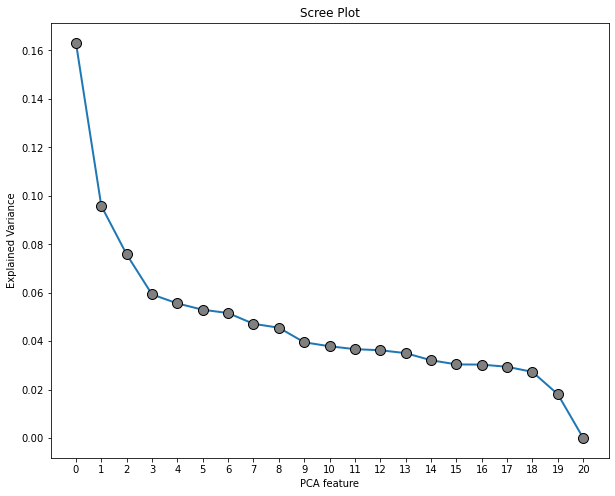

In [159]:
# instantiating a PCA object with no limit to principal components
pca_non_demo = PCA(n_components = None,
          random_state = 219)


# fitting and transforming the scaled data
non_demographic_pca = pca_non_demo.fit_transform(non_demographic_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_non_demo)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>PCA with Limit</h3>

In [160]:
# instantiating a PCA object with limit to principal components
pca_non_demo = PCA(n_components = 4,
            random_state = 219)


# fitting and treansforming the scaled data
non_demographic_pca = pca_non_demo.fit_transform(non_demographic_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", non_demographic_scaled.shape)
print("PCA shape     :", non_demographic_pca.shape)

Original shape: (1552, 21)
PCA shape     : (1552, 4)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Evaluating PCA Algorithms</h3>

**a)Print each explained variance ratio**

In [161]:
# fitting and trasnforming the scaled data
survey_pca_non_demo = pca_non_demo.fit_transform(non_demographic_scaled)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca_non_demo.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.163
PC 2: 0.096
PC 3: 0.076
PC 4: 0.059


In [162]:
# printing the sum of all explained variance ratios
print(pca_non_demo.explained_variance_ratio_.sum())

0.39406464453030143


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


**b)Call scree-plot on PCA object with limit**

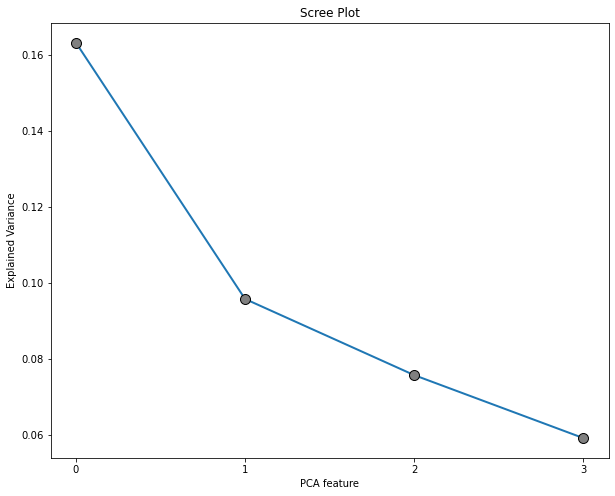

In [163]:
# calling the scree_plot function
scree_plot(pca_non_demo)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Interpreting Principal Components and Persona Development</h3>
 
**a)Analyze PC Factor Loadings**

In [164]:
# transposing pca components
non_demographic_factor_loadings = pd.DataFrame(np.transpose(pca_non_demo.components_.round(decimals = 2)))


# naming rows as original features
non_demographic_factor_loadings = non_demographic_factor_loadings.set_index(non_demographic_q.columns)


# checking the result
print(non_demographic_factor_loadings)

          0     1     2     3
q2r1   0.20 -0.30  0.52 -0.17
q2r2   0.24  0.14  0.10 -0.11
q2r3   0.00  0.14 -0.64  0.01
q2r4   0.11  0.30 -0.01 -0.01
q2r5   0.15  0.40  0.06 -0.29
q2r6   0.15  0.40  0.04 -0.19
q2r7   0.16  0.39  0.02 -0.31
q2r8   0.26  0.05  0.16 -0.19
q2r9  -0.07  0.11  0.07  0.33
q2r10 -0.00  0.00 -0.00 -0.00
q4r1   0.24 -0.28  0.02 -0.23
q4r2   0.32  0.14  0.01  0.30
q4r3   0.31 -0.08 -0.12  0.26
q4r4   0.32  0.13 -0.04  0.33
q4r5   0.21 -0.17 -0.34 -0.15
q4r6   0.19 -0.24 -0.28 -0.21
q4r7   0.29 -0.08 -0.02  0.17
q4r8   0.30 -0.10 -0.01  0.19
q4r9   0.32 -0.06  0.11  0.17
q4r10 -0.03 -0.07  0.07 -0.08
q4r11 -0.17  0.25  0.23  0.33


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**b)Name each principal component based on its factor loading**

(i) Loyal Brander & All Inclusive : This is someone who sticks to one brand and only updates to new gadgets and versions from that brand. They want all of the features and utilize all of the phone's apps.</br>

(ii) Work Related User : Users who use their devices just for work, typically a second phone provided by the employer for direct contact. It's kept professional with apps that help with job knowledge. </br>

(iii) Single Device Gamer User : A person who only buys phones with high resolutions to play games on. They don't care about social media or other businesses besides I-Phone.</br>

(iv) Non-brand Media Watcher : This person does not require a specific brand of cellphone in order to enjoy media viewing. They spend their time watching television and engaging in other forms of entertainment. They don't care about social networking sites or music streaming services.</br>

In [165]:
# naming each principal component
non_demographic_factor_loadings.columns = ['Loyal Brander & All Inclusive',
                                           'Work related user','Single Device Gamer User', 
                                          'Nonbrand Media watcher']


# checking the result
non_demographic_factor_loadings

,Loyal Brander & All Inclusive,Work related user,Single Device Gamer User,Nonbrand Media watcher
q2r1,0.20,-0.30,0.52,-0.17
q2r2,0.24,0.14,0.10,-0.11
q2r3,0.00,0.14,-0.64,0.01
q2r4,0.11,0.30,-0.01,-0.01
q2r5,0.15,0.40,0.06,-0.29
q2r6,0.15,0.40,0.04,-0.19
q2r7,0.16,0.39,0.02,-0.31
q2r8,0.26,0.05,0.16,-0.19
q2r9,-0.07,0.11,0.07,0.33
q2r10,-0.00,0.00,-0.00,-0.00


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**c)Convert into Data Frame**

In [166]:
# fitting and trasnforming the scaled data
non_demographic_factor_loadings_survey = pca_non_demo.transform(non_demographic_scaled)


# converting into a DataFrame 
non_demographic_factor_loadings_df = pd.DataFrame(non_demographic_factor_loadings_survey)


# renaming columns
non_demographic_factor_loadings_df.columns = non_demographic_factor_loadings.columns


# checking results
non_demographic_factor_loadings_df

,Loyal Brander & All Inclusive,Work related user,Single Device Gamer User,Nonbrand Media watcher
0,-2.694981,0.653904,-1.071565,-0.093369
1,-0.352704,1.650556,-0.444540,2.818963
2,-1.556477,1.692481,-0.275585,-1.750736
3,-0.382667,0.243492,1.186490,0.551420
4,-2.270081,-0.224397,2.057062,-0.423836
...,...,...,...,...
1547,1.884374,-1.062571,0.513938,0.421267
1548,1.742829,-1.299893,0.891484,-0.808754
1549,4.222261,-0.018910,1.031230,1.006401
1550,1.175220,-1.579441,-0.839384,0.300526


In [167]:
# exploring customers in the 'Loyal Brander & All Inclusive' persona
non_demographic_factor_loadings_df['Loyal Brander & All Inclusive'][non_demographic_factor_loadings_df['Loyal Brander & All Inclusive'] > 1.0]



34      2.549913
42      1.270309
61      3.041862
62      1.705496
71      1.051482
72      2.311343
84      2.624498
85      2.293466
92      2.315609
107     4.205307
119     1.533001
125     2.323891
131     3.982315
134     6.229007
140     4.477164
144     1.308220
146     2.452615
155     2.885474
159     2.044624
160     1.139105
168     2.323891
170     1.115632
175     2.711129
179     1.374014
183     2.236041
191     2.235199
194     1.742250
199     1.837504
201     2.504525
202     2.024271
211     2.046169
213     4.482813
215     1.705968
218     2.617303
219     1.257761
223     1.043200
224     1.482038
226     4.025641
230     3.461933
231     1.784071
232     2.006681
238     1.014324
241     3.707460
243     2.896570
244     4.959169
246     1.256347
247     2.273846
248     2.021393
257     1.028422
263     6.229007
267     2.183188
272     1.310150
277     6.229007
279     2.267149
281     4.183048
282     2.647843
285     1.280514
287     1.348092
288     2.2897

In [168]:
# obtain length 'Loyal Brander & All Inclusive' persona
len(non_demographic_factor_loadings_df['Loyal Brander & All Inclusive'][non_demographic_factor_loadings_df['Loyal Brander & All Inclusive'] > 1.0])/len(non_demographic_factor_loadings_df['Loyal Brander & All Inclusive'])


0.26353092783505155

In [169]:
# exploring customers in the 'Work related user'persona
non_demographic_factor_loadings_df['Work related user'][non_demographic_factor_loadings_df['Work related user'] > 1.0]

1       1.650556
2       1.692481
5       3.939943
11      2.298201
16      2.298201
20      1.451839
25      2.298201
29      3.184840
31      1.990800
33      1.112684
38      2.092213
40      1.075381
41      1.112684
43      3.184840
45      2.357046
48      3.643620
60      2.016468
61      1.360664
68      1.053326
72      1.920957
78      1.222931
82      1.766278
86      1.539820
87      1.269993
90      4.291170
98      1.289333
101     1.112684
107     6.845185
115     1.916286
117     2.834828
124     1.611593
129     1.112684
131     6.916318
134     5.387496
136     1.002168
139     3.445104
142     1.374347
145     1.766278
146     4.296294
147     1.349907
148     1.021544
149     1.924659
152     1.112684
154     2.038912
161     1.957883
165     1.545072
171     1.798129
172     1.774615
193     1.648086
197     2.161302
198     1.924659
208     1.057285
209     1.086292
212     1.916286
214     4.814293
216     1.323104
218     1.050463
219     1.120698
222     1.4090

In [170]:
# obtain length 'Work related user' persona
len(non_demographic_factor_loadings_df['Work related user'][non_demographic_factor_loadings_df['Work related user'] > 1.0])/len(non_demographic_factor_loadings_df['Work related user'])



0.16172680412371135

In [171]:
# exploring customers in the 'Single Device Gamer User' persona
non_demographic_factor_loadings_df['Single Device Gamer User'][non_demographic_factor_loadings_df['Single Device Gamer User'] > 1.0]


3       1.186490
4       2.057062
5       1.394578
11      3.779196
16      3.779196
20      1.123848
25      3.779196
29      1.412859
43      1.412859
44      1.043062
45      1.166051
47      1.093774
48      2.717427
55      1.431368
60      1.670954
64      1.014579
66      1.089954
69      1.053882
77      2.476731
81      1.024905
96      1.763768
106     1.218788
107     1.481374
112     1.106287
119     1.405561
120     1.287657
124     1.170853
139     3.108055
140     1.173950
141     2.185616
144     1.114050
151     1.263200
154     1.026090
162     2.010056
164     1.763768
167     1.354150
170     1.301719
172     1.138013
173     2.305711
182     1.213389
193     1.365978
196     1.458975
202     1.157793
217     1.443880
225     1.014364
230     1.840780
237     2.530244
244     1.293222
245     1.495561
250     1.213389
280     3.779196
285     1.079557
296     1.655006
309     1.294771
311     1.003283
314     1.219608
324     1.385921
327     1.196887
337     1.0444

In [172]:
# obtain length 'Single Device Gamer User' persona
len(non_demographic_factor_loadings_df['Single Device Gamer User'][non_demographic_factor_loadings_df['Single Device Gamer User'] > 1.0])/len(non_demographic_factor_loadings_df['Single Device Gamer User'])



0.21971649484536082

In [173]:
# exploring customers in the 'Nonbrand Media watcher' persona
non_demographic_factor_loadings_df['Nonbrand Media watcher'][non_demographic_factor_loadings_df['Nonbrand Media watcher'] > 1.0]


1       2.818963
5       2.970291
6       1.016505
11      2.637624
14      1.309529
16      2.637624
19      1.169458
20      1.085380
23      3.966705
25      2.637624
29      3.000564
35      1.958542
36      1.517087
38      1.150566
39      1.706886
40      2.741643
43      3.000564
44      2.076611
48      2.952216
62      2.362153
65      1.039773
67      1.082895
71      1.402794
84      1.183679
86      1.590867
98      2.355143
102     1.958542
103     1.244927
105     1.814325
115     3.158729
118     1.331097
123     1.731908
125     2.140864
135     1.958542
139     4.716481
147     1.757515
151     1.018934
155     1.460264
158     1.270163
160     2.299583
163     1.154066
168     2.140864
173     1.640876
175     1.777923
181     1.385713
186     1.622548
191     1.157154
200     1.537892
201     1.498271
210     1.110284
211     1.427968
212     3.158729
215     1.615108
230     1.389059
231     1.341380
234     1.156495
238     1.094303
243     1.878500
245     1.2617

In [174]:
# obtain length 'Nonbrand Media watcher' persona
len(non_demographic_factor_loadings_df['Nonbrand Media watcher'][non_demographic_factor_loadings_df['Nonbrand Media watcher'] > 1.0])/len(non_demographic_factor_loadings_df['Nonbrand Media watcher'])



0.17525773195876287

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Application/App Features</h2><br>
<h3>Apply Unsupervised Scaler Function</h3><br>

In [175]:
# applying the unsupervised_scaler function
app_scaled = unsupervised_scaler(df = app_q)

# checking pre- and post-scaling variance
print(np.var(app_q), '\n\n')
print(np.var(app_scaled))

q11       1.041629
q12       1.801433
q13r1     0.768333
q13r2     1.538911
q13r3     1.019038
q13r4     1.393160
q13r5     1.150461
q13r6     0.644934
q13r7     0.915226
q13r8     0.983015
q13r9     1.360026
q13r10    1.393093
q13r11    1.140896
q13r12    1.584795
dtype: float64 


q11       1.0
q12       1.0
q13r1     1.0
q13r2     1.0
q13r3     1.0
q13r4     1.0
q13r5     1.0
q13r6     1.0
q13r7     1.0
q13r8     1.0
q13r9     1.0
q13r10    1.0
q13r11    1.0
q13r12    1.0
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />




<h3>PCA with No Limit</h3>

Instantiate PCA with no limit and call scree-plot on PCA object

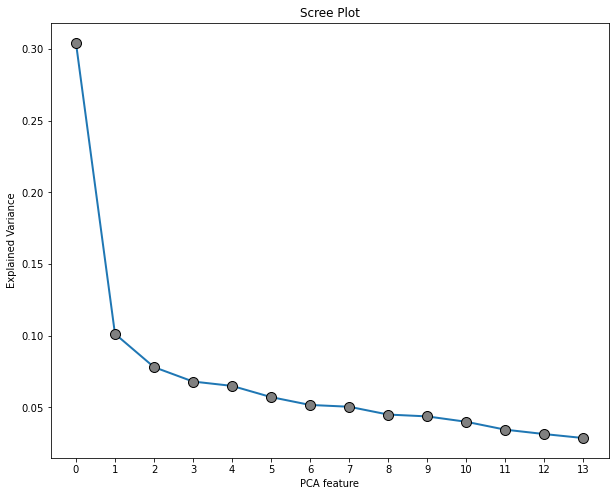

In [176]:
# instantiating a PCA object with no limit to principal components
pca_a = PCA(n_components = None,
          random_state = 219)


# fitting and transforimg the scaled data
app_pca = pca_a.fit_transform(app_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_a)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>PCA with Limit</h3>

In [177]:
# instantiating a PCA object with limit to principal components
pca_a = PCA(n_components = 4,
            random_state = 219)


# fitting and transforming the scaled data
app_pca = pca_a.fit_transform(app_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", app_scaled.shape)
print("PCA shape     :", app_pca.shape)

Original shape: (1552, 14)
PCA shape     : (1552, 4)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h3>Evaluating PCA Algorithms</h3>

**a)Print each explained variance ratio**

In [178]:
# fitting and transforming the scaled data
survey_pca_a = pca_a.fit_transform(app_scaled)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca_a.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.304
PC 2: 0.101
PC 3: 0.078
PC 4: 0.068


In [179]:
# printing the sum of all explained variance ratios
print(pca_a.explained_variance_ratio_.sum())

0.5519194458237513


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


**b)Call scree-plot on PCA object with limit**

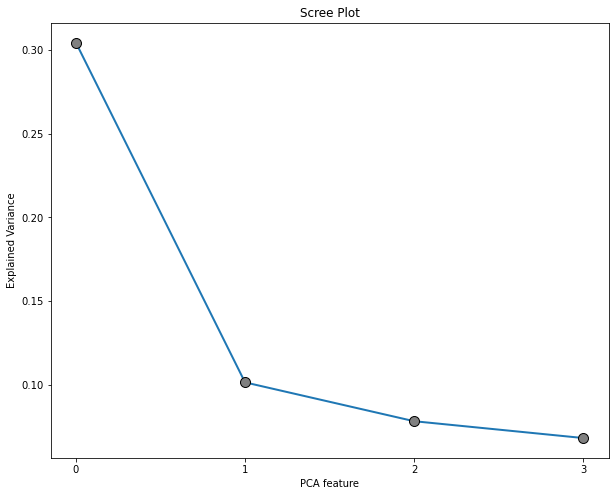

In [180]:
# calling the scree_plot function
scree_plot(pca_a)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Interpreting Principal Components and Persona Development</h3>
 
**a)Analyze PC Factor Loadings**

In [181]:
# transposing pca components
app_factor_loadings = pd.DataFrame(np.transpose(pca_a.components_.round(decimals = 2)))


# naming rows as original features
app_factor_loadings = app_factor_loadings.set_index(app_q.columns)


# checking the result
print(app_factor_loadings)

           0     1     2     3
q11     0.02 -0.49  0.49 -0.26
q12    -0.16 -0.17 -0.29 -0.21
q13r1  -0.11  0.36  0.52  0.50
q13r2  -0.30  0.04  0.01  0.44
q13r3  -0.34 -0.27  0.08  0.18
q13r4  -0.22  0.33 -0.07 -0.29
q13r5  -0.33 -0.02  0.00 -0.14
q13r6  -0.21  0.25  0.45 -0.27
q13r7  -0.36 -0.26 -0.03  0.02
q13r8  -0.37 -0.08 -0.04 -0.06
q13r9  -0.30 -0.28  0.17 -0.05
q13r10 -0.26  0.31 -0.22 -0.13
q13r11 -0.28 -0.05 -0.33  0.30
q13r12 -0.24  0.32  0.08 -0.34


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**b)Name each principal component based on its factor loading**

(i) Non-app Enthusiasm : A person who uses upgraded gadgets, such as the I-Phone, but does not use social media or apps, is said to be non-app enthusiast. </br>

(ii) A media streamer : This is someone who only uses media streaming services such as YouTube, IMDB, and Pandora. They are uninterested in any type of social networking </br>

(iii) Aware but private : They use social media platforms but does not stream apps (save for movies). E.g., Not a Netflix subscriber </br>

(iv) Professional: Uses Facebook, Twitter, and LinkedIn as a discussion and maybe marketing platform for the public. Apps that a worker would use on his or her work phone. </br>

In [182]:
# naming each principal component
app_factor_loadings.columns = ['Non-app Enthusiasm','Media Streamer',
                                  'Aware but Private','Professional']


# checking the result
app_factor_loadings

,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
q11,0.02,-0.49,0.49,-0.26
q12,-0.16,-0.17,-0.29,-0.21
q13r1,-0.11,0.36,0.52,0.50
q13r2,-0.30,0.04,0.01,0.44
q13r3,-0.34,-0.27,0.08,0.18
q13r4,-0.22,0.33,-0.07,-0.29
q13r5,-0.33,-0.02,0.00,-0.14
q13r6,-0.21,0.25,0.45,-0.27
q13r7,-0.36,-0.26,-0.03,0.02
q13r8,-0.37,-0.08,-0.04,-0.06


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**c)Convert into Data Frame**

In [183]:
# fitting and trasnforming the scaled data
app_factor_loadings_survey = pca_a.transform(app_scaled)

# converting into a DataFrame 
app_factor_loadings_df = pd.DataFrame(app_factor_loadings_survey)


# renaming columns
app_factor_loadings_df.columns = app_factor_loadings.columns


# checking results
app_factor_loadings_df

,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
0,-2.895073,2.467685,0.488530,-0.292128
1,3.120662,0.520045,0.604544,-0.158079
2,-1.532506,0.980578,-1.753240,0.253113
3,-1.963231,1.712733,-0.677650,0.052743
4,1.782296,0.538104,0.563793,-0.318806
...,...,...,...,...
1547,0.660860,0.009302,-0.762645,1.194119
1548,-1.513172,-1.158494,0.785751,0.163075
1549,4.441547,0.528599,0.720382,0.708014
1550,0.010765,-1.671919,-0.693734,1.806796


In [184]:
# exploring customers in the 'Non-app Enthusiasm' persona
app_factor_loadings_df['Non-app Enthusiasm'][app_factor_loadings_df['Non-app Enthusiasm'] > 1.0]

1       3.120662
4       1.782296
14      1.025315
17      3.124568
23      1.150829
34      1.751018
39      1.492517
42      1.880472
44      4.182258
47      5.455562
52      3.042891
59      2.227595
61      3.743241
64      2.300113
72      2.271675
73      1.351201
83      2.557460
84      1.753899
86      5.303620
87      1.109793
90      1.780582
91      1.098121
92      1.767259
96      2.604469
97      1.644453
101     1.531099
102     1.045438
106     1.239512
107     2.697221
114     3.128111
115     2.356074
122     2.790184
123     1.142918
124     1.862707
125     1.274023
126     2.183006
131     3.699782
132     1.156879
134     5.413810
140     3.903754
146     4.105994
147     2.910567
151     1.712604
159     3.365118
160     1.675006
165     2.028866
166     2.077069
167     5.685902
168     3.334573
170     4.435697
173     1.187215
174     2.186761
175     2.165634
177     2.338084
178     1.633123
179     4.420761
183     6.058387
186     5.274261
189     1.2717

In [185]:
# obtain length 'Non-app Enthusiasm' persona
len(app_factor_loadings_df['Non-app Enthusiasm'][app_factor_loadings_df['Non-app Enthusiasm'] > 1.0])/len(app_factor_loadings_df['Non-app Enthusiasm'])




0.27255154639175255

In [186]:
# exploring customers in the 'Media Streamer' persona
app_factor_loadings_df['Media Streamer'][app_factor_loadings_df['Media Streamer'] > 1.0]

0       2.467685
3       1.712733
5       3.246322
11      2.550406
14      1.093186
16      2.638496
18      2.436182
20      2.022431
22      1.147567
23      1.878923
25      1.865238
29      1.008484
31      1.197793
41      1.398231
45      2.260943
48      2.483670
50      1.619778
54      2.048347
58      1.210309
60      1.127214
64      2.149555
77      2.807556
78      2.921253
80      1.413183
81      1.310450
82      2.563536
83      1.445913
86      1.172156
87      1.963802
90      1.658976
91      1.004566
101     1.607264
102     2.016659
107     1.086666
111     1.081105
117     2.019383
118     1.859706
119     1.325321
122     1.694645
123     1.198749
124     1.941221
126     1.655862
127     1.750048
128     1.596433
130     1.018850
131     1.570641
132     2.241632
135     1.268762
136     1.673001
138     2.448473
139     1.401444
140     1.127102
141     2.352581
142     1.337783
145     1.725943
147     1.120622
149     1.757660
152     1.553960
154     2.3989

In [187]:
# obtain length 'Media Streamer' persona
len(app_factor_loadings_df['Media Streamer'][app_factor_loadings_df['Media Streamer'] > 1.0])/len(app_factor_loadings_df['Media Streamer'])




0.21456185567010308

In [188]:
# exploring customers in the 'Aware but Private' persona
app_factor_loadings_df['Aware but Private'][app_factor_loadings_df['Aware but Private'] > 1.0]

11      1.863367
27      1.857175
34      1.259471
52      1.136827
59      1.140249
60      1.705282
65      1.451114
77      1.349648
112     1.046427
117     1.024754
130     1.448021
131     1.951953
141     1.986757
146     1.529887
153     1.537410
155     1.574616
162     1.936116
163     1.537327
164     1.742832
172     1.286276
181     1.538562
186     1.685826
193     2.589979
209     4.507993
230     1.049638
236     1.073400
239     3.113713
254     2.133442
258     2.124892
261     2.019232
271     1.033754
280     2.969358
282     1.356997
287     1.221184
291     2.003433
292     2.151502
309     1.147524
316     1.090045
330     2.521638
335     1.277738
340     1.632891
369     1.223691
381     1.076919
390     1.557609
391     1.288115
395     1.862796
398     1.121678
408     2.524026
424     1.174922
445     2.230747
480     1.332149
517     2.281648
556     1.472935
569     1.714303
573     1.216376
574     1.259914
580     2.486424
585     1.242725
609     1.7265

In [189]:
# obtain length 'Aware but Private' persona
len(app_factor_loadings_df['Aware but Private'][app_factor_loadings_df['Aware but Private'] > 1.0])/len(app_factor_loadings_df['Aware but Private'])




0.1404639175257732

In [190]:
# exploring customers in the 'Professional' persona
app_factor_loadings_df['Professional'][app_factor_loadings_df['Professional'] > 1.0]

5       1.069174
11      2.511156
14      2.087264
15      1.584990
16      2.286561
27      1.588847
33      1.816060
42      2.083043
45      1.645081
46      1.065305
48      1.586428
49      1.759908
60      2.737615
65      3.156602
70      1.271954
77      1.149007
78      1.638377
81      1.554757
93      2.926156
100     1.707292
119     1.100108
126     2.392941
128     1.094839
130     1.833431
155     2.211942
162     1.374637
165     1.151856
169     1.210575
180     1.468999
182     1.002878
186     1.838549
191     1.350126
195     2.143144
211     1.325275
217     1.234684
227     2.314781
240     1.444099
249     1.849519
250     1.456258
252     2.520500
254     1.178624
260     1.657374
271     1.623190
272     1.472605
274     1.646161
275     1.690708
276     1.886341
278     1.789877
289     1.032597
292     1.529694
307     2.418492
314     1.170137
315     1.111641
324     1.149353
335     1.318273
336     1.042939
338     1.178358
342     1.154536
344     1.7981

In [191]:
# obtain length 'Professional' persona
len(app_factor_loadings_df['Professional'][app_factor_loadings_df['Professional'] > 1.0])/len(app_factor_loadings_df['Professional'])




0.15335051546391754

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Clustering</h1> </br>
<h2>Check Variance amongst Clusters</h2>

In [192]:
# checking variance amongst clusters
np.var(psychometric_factor_loadings_df)

Tech Savvy       11.072911
Resource User     3.499891
Conformist        1.941058
dtype: float64

In [193]:
# checking variance amongst clusters
np.var(non_demographic_factor_loadings_df)

Loyal Brander & All Inclusive    3.264382
Work related user                1.916469
Single Device Gamer User         1.515963
Nonbrand Media watcher           1.185180
dtype: float64

In [194]:
# checking variance amongst clusters
np.var(app_factor_loadings_df)

Non-app Enthusiasm    4.260929
Media Streamer        1.418872
Aware but Private     1.093923
Professional          0.953149
dtype: float64

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Apply Unsupervised Scaler Function</h2>

**a) Regroup all PCA using 'concat'**

In [195]:
#concat three features question together
pca_full_df = pd.concat([psychometric_factor_loadings_df, non_demographic_factor_loadings_df,app_factor_loadings_df], axis=1)

# checking results
pca_full_df

,Tech Savvy,Resource User,Conformist,Loyal Brander & All Inclusive,Work related user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
0,6.818315,1.298797,-2.171385,-2.694981,0.653904,-1.071565,-0.093369,-2.895073,2.467685,0.488530,-0.292128
1,-4.592837,2.425746,0.922627,-0.352704,1.650556,-0.444540,2.818963,3.120662,0.520045,0.604544,-0.158079
2,6.275900,0.922359,-0.110973,-1.556477,1.692481,-0.275585,-1.750736,-1.532506,0.980578,-1.753240,0.253113
3,-2.924366,1.549856,0.383798,-0.382667,0.243492,1.186490,0.551420,-1.963231,1.712733,-0.677650,0.052743
4,-0.365367,2.356819,0.788238,-2.270081,-0.224397,2.057062,-0.423836,1.782296,0.538104,0.563793,-0.318806
...,...,...,...,...,...,...,...,...,...,...,...
1547,-3.577884,-0.127534,0.286657,1.884374,-1.062571,0.513938,0.421267,0.660860,0.009302,-0.762645,1.194119
1548,-2.574690,-0.328572,-2.563027,1.742829,-1.299893,0.891484,-0.808754,-1.513172,-1.158494,0.785751,0.163075
1549,-3.579357,1.416549,0.615081,4.222261,-0.018910,1.031230,1.006401,4.441547,0.528599,0.720382,0.708014
1550,-2.106452,-0.010458,-1.215829,1.175220,-1.579441,-0.839384,0.300526,0.010765,-1.671919,-0.693734,1.806796


**b) Complete the code to prepare a scaled version of the factor loadings dataset**

In [196]:
# applying the unsupervised_scaler function
pca_scaled_full = unsupervised_scaler(df = pca_full_df)


# checking pre- and post-scaling variance
print(np.var(pca_scaled_full), '\n\n')
print(np.var(pca_full_df))

Tech Savvy                       1.0
Resource User                    1.0
Conformist                       1.0
Loyal Brander & All Inclusive    1.0
Work related user                1.0
Single Device Gamer User         1.0
Nonbrand Media watcher           1.0
Non-app Enthusiasm               1.0
Media Streamer                   1.0
Aware but Private                1.0
Professional                     1.0
dtype: float64 


Tech Savvy                       11.072911
Resource User                     3.499891
Conformist                        1.941058
Loyal Brander & All Inclusive     3.264382
Work related user                 1.916469
Single Device Gamer User          1.515963
Nonbrand Media watcher            1.185180
Non-app Enthusiasm                4.260929
Media Streamer                    1.418872
Aware but Private                 1.093923
Professional                      0.953149
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Agglomerative Clustering</h2>
<h3>Dendrogram</h3>



**a) Understand how many clusters to build using k-Means**

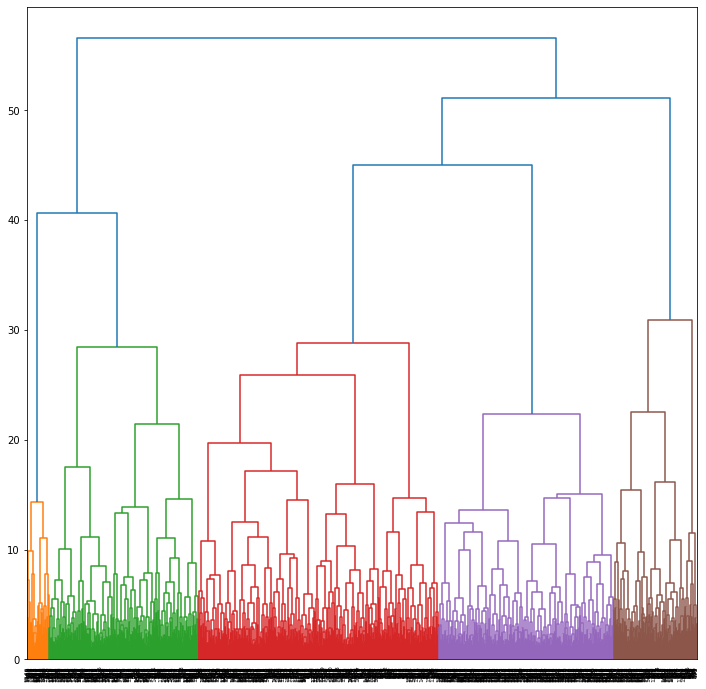

In [197]:
# grouping data based on 'ward' distance
standard_mergings_ward = linkage(y = pca_scaled_full,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>k-Means model with five clusters</h3>

In [198]:
# instantiating a k-Means object with five clusters
survey_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled_full)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

0    508
3    502
4    301
2    188
1     53
Name: Cluster, dtype: int64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Display centroids for each cluster</h3>

In [199]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Tech Savvy','Resource User','Conformist',
                            'Loyal Brander & All Inclusive','Work releated user',
                            'Single Device Gamer User', 'Nonbrand Media watcher',
                            'Non-app Enthusiasm','Media Streamer','Aware but Private', 
                            'Professional']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Tech Savvy,Resource User,Conformist,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
0,0.30,-0.02,-0.01,-0.56,0.15,-0.75,-0.16,-0.44,0.11,-0.69,-0.11
1,-0.59,0.82,-0.04,2.07,3.20,0.30,-1.70,1.46,0.35,0.35,-0.10
2,0.79,0.35,0.69,-0.82,0.48,0.96,0.47,-0.54,1.18,1.00,0.99
3,0.02,-0.59,-0.27,0.26,-0.73,0.48,-0.24,-0.25,-0.72,0.31,-0.19
4,-0.93,0.66,0.05,0.65,0.10,-0.18,0.69,1.24,0.23,-0.05,-0.10


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Concatenate into one Data Frame</h3>

**a) Complete the code to concatenate the demographics and the PCA components into one DataFrame**

In [200]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                          pca_full_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['q1','q49','q54','q55','q57','q48','q56']],
                                clst_pca_df.round(decimals = 2)],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Age','Marital Status','Race','Hispanic/ Latino',
                              'Gender','Education','Income','Cluster','Tech Savvy',
                              'Resource User','Conformist','Loyal Brander & All Inclusive',
                              'Work releated user','Single Device Gamer User',
                              'Nonbrand Media watcher','Non-app Enthusiasm','Media Streamer',
                              'Aware but Private','Professional']
final_pca_clust_df

,Age,Marital Status,Race,Hispanic/ Latino,Gender,Education,Income,Cluster,Tech Savvy,Resource User,Conformist,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
0,10,4,2,2,1,3,5,0,6.82,1.30,-2.17,-2.69,0.65,-1.07,-0.09,-2.90,2.47,0.49,-0.29
1,5,1,3,2,2,5,10,4,-4.59,2.43,0.92,-0.35,1.65,-0.44,2.82,3.12,0.52,0.60,-0.16
2,7,4,2,2,1,4,6,0,6.28,0.92,-0.11,-1.56,1.69,-0.28,-1.75,-1.53,0.98,-1.75,0.25
3,7,1,1,2,1,2,5,2,-2.92,1.55,0.38,-0.38,0.24,1.19,0.55,-1.96,1.71,-0.68,0.05
4,2,2,3,2,2,5,4,2,-0.37,2.36,0.79,-2.27,-0.22,2.06,-0.42,1.78,0.54,0.56,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2,2,6,1,1,2,1,4,-3.58,-0.13,0.29,1.88,-1.06,0.51,0.42,0.66,0.01,-0.76,1.19
1548,4,1,1,2,2,3,9,3,-2.57,-0.33,-2.56,1.74,-1.30,0.89,-0.81,-1.51,-1.16,0.79,0.16
1549,3,2,1,2,2,4,12,4,-3.58,1.42,0.62,4.22,-0.02,1.03,1.01,4.44,0.53,0.72,0.71
1550,2,2,6,1,1,2,7,3,-2.11,-0.01,-1.22,1.18,-1.58,-0.84,0.30,0.01,-1.67,-0.69,1.81


**b) Add labels to categorical variables**

In [201]:
# renaming 'age'
for index, col in final_pca_clust_df.iterrows():
    if final_pca_clust_df.loc[index, 'Age'] == 1:
        final_pca_clust_df.loc[index, 'Age'] = 'Under 18'   
    
    elif final_pca_clust_df.loc[index, 'Age'] == 2:        
        final_pca_clust_df.loc[index, 'Age'] = '18-24'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 3:        
        final_pca_clust_df.loc[index, 'Age'] = '25-29'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 4:        
        final_pca_clust_df.loc[index, 'Age'] = '30-34'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 5:        
        final_pca_clust_df.loc[index, 'Age'] = '35-39'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 6:        
        final_pca_clust_df.loc[index, 'Age'] = '40-44'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 7:        
        final_pca_clust_df.loc[index, 'Age'] = '45-49'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 8:        
        final_pca_clust_df.loc[index, 'Age'] = '50-54'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 9:        
        final_pca_clust_df.loc[index, 'Age'] = '55-59'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 10:        
        final_pca_clust_df.loc[index, 'Age'] = '60-64'
    
    elif final_pca_clust_df.loc[index, 'Age'] == 11:        
        final_pca_clust_df.loc[index, 'Age'] = '65 or over'
    
    # renaming 'marital status'
    if final_pca_clust_df.loc[index, 'Marital Status'] == 1:        
        final_pca_clust_df.loc[index, 'Marital Status'] = 'Married'
    
    elif final_pca_clust_df.loc[index, 'Marital Status'] == 2:        
        final_pca_clust_df.loc[index, 'Marital Status'] = 'Single'
    
    elif final_pca_clust_df.loc[index, 'Marital Status'] == 3:        
        final_pca_clust_df.loc[index, 'Marital Status'] = 'Single with a partner'
    
    elif final_pca_clust_df.loc[index, 'Marital Status'] == 4:        
        final_pca_clust_df.loc[index, 'Marital Status'] = 'Separated/Widowed/Divorced'
    
    # renaming 'race'
    if final_pca_clust_df.loc[index, 'Race'] == 1:
        final_pca_clust_df.loc[index, 'Race'] = 'White or Caucasian'   
    
    elif final_pca_clust_df.loc[index, 'Race'] == 2:        
        final_pca_clust_df.loc[index, 'Race'] = 'Black or African American'
    
    elif final_pca_clust_df.loc[index, 'Race'] == 3:        
        final_pca_clust_df.loc[index, 'Race'] = 'Asian'
    
    elif final_pca_clust_df.loc[index, 'Race'] == 4:        
        final_pca_clust_df.loc[index, 'Race'] = 'Native Hawaiian or Other Pacific Islander'
    
    elif final_pca_clust_df.loc[index, 'Race'] == 5:        
        final_pca_clust_df.loc[index, 'Race'] = 'American Indian or Alaska Native'
    
    elif final_pca_clust_df.loc[index, 'Race'] == 6:        
        final_pca_clust_df.loc[index, 'Race'] = 'Other race'
    
    # renaming 'hispanic/latino'
    if final_pca_clust_df.loc[index, 'Hispanic/ Latino'] == 1:
        final_pca_clust_df.loc[index, 'Hispanic/ Latino'] = 'Yes'   
    
    elif final_pca_clust_df.loc[index, 'Hispanic/ Latino'] == 2:        
        final_pca_clust_df.loc[index, 'Hispanic/ Latino'] = 'No'
    
    if final_pca_clust_df.loc[index, 'Gender'] == 1:
        final_pca_clust_df.loc[index, 'Gender'] = 'Male'   
    
    elif final_pca_clust_df.loc[index, 'Gender'] == 2:        
        final_pca_clust_df.loc[index, 'Gender'] = 'Female'
    
    # renaming 'education'
    if final_pca_clust_df.loc[index, 'Education'] == 1:
        final_pca_clust_df.loc[index, 'Education'] = 'Some high school'   
    
    elif final_pca_clust_df.loc[index, 'Education'] == 2:        
        final_pca_clust_df.loc[index, 'Education'] = 'High school graduate'
    
    elif final_pca_clust_df.loc[index, 'Education'] == 3:        
        final_pca_clust_df.loc[index, 'Education'] = 'Some college'
    
    elif final_pca_clust_df.loc[index, 'Education'] == 4:        
        final_pca_clust_df.loc[index, 'Education'] = 'College graduate'
    
    elif final_pca_clust_df.loc[index, 'Education'] == 5:        
        final_pca_clust_df.loc[index, 'Education'] = 'Some post-graduate studies'
    
    elif final_pca_clust_df.loc[index, 'Education'] == 6:        
        final_pca_clust_df.loc[index, 'Education'] = 'Post-graduate degree'
    
    # renaming 'income'
    if final_pca_clust_df.loc[index, 'Income'] == 1:
        final_pca_clust_df.loc[index, 'Income'] = 'Under $10k'   
    
    elif final_pca_clust_df.loc[index, 'Income'] == 2:        
        final_pca_clust_df.loc[index, 'Income'] = '$10k-$15k'
    
    elif final_pca_clust_df.loc[index, 'Income'] == 3:        
        final_pca_clust_df.loc[index, 'Income'] = '$15k-$20k'
    
    elif final_pca_clust_df.loc[index, 'Income'] == 4:        
        final_pca_clust_df.loc[index, 'Income'] = '$20k-$30k'
    
    elif final_pca_clust_df.loc[index, 'Income'] == 5:        
        final_pca_clust_df.loc[index, 'Income'] = '$30k-$40k'
    
    elif final_pca_clust_df.loc[index, 'Income'] == 6:        
        final_pca_clust_df.loc[index, 'Income'] = '$40k-$50k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 7:        
        final_pca_clust_df.loc[index, 'Income'] = '$50k-$60k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 8:        
        final_pca_clust_df.loc[index, 'Income'] = '$60k-$70k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 9:        
        final_pca_clust_df.loc[index, 'Income'] = '$70k-$80k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 10:        
        final_pca_clust_df.loc[index, 'Income'] = '$80k-$90k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 11:        
        final_pca_clust_df.loc[index, 'Income'] = '$00k-$100k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 12:        
        final_pca_clust_df.loc[index, 'Income'] = '$100k-$125k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 13:        
        final_pca_clust_df.loc[index, 'Income'] = '$125k-$150k'
        
    elif final_pca_clust_df.loc[index, 'Income'] == 14:        
        final_pca_clust_df.loc[index, 'Income'] = '$150k and Over'
    
    # renaming 'cluster'
    if final_pca_clust_df.loc[index, 'Cluster'] == 0:
        final_pca_clust_df.loc[index, 'Cluster'] = 'Cluster 1'   
    
    elif final_pca_clust_df.loc[index, 'Cluster'] == 1:        
        final_pca_clust_df.loc[index, 'Cluster'] = 'Cluster 2'
    
    elif final_pca_clust_df.loc[index, 'Cluster'] == 2:        
        final_pca_clust_df.loc[index, 'Cluster'] = 'Cluster 3'
    
    elif final_pca_clust_df.loc[index, 'Cluster'] == 3:        
        final_pca_clust_df.loc[index, 'Cluster'] = 'Cluster 4'
    
    elif final_pca_clust_df.loc[index, 'Cluster'] == 4:        
        final_pca_clust_df.loc[index, 'Cluster'] = 'Cluster 5'
        
# check results   
final_pca_clust_df

,Age,Marital Status,Race,Hispanic/ Latino,Gender,Education,Income,Cluster,Tech Savvy,Resource User,Conformist,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Professional
0,60-64,Separated/Widowed/Divorced,Black or African American,No,Male,Some college,$30k-$40k,Cluster 1,6.82,1.30,-2.17,-2.69,0.65,-1.07,-0.09,-2.90,2.47,0.49,-0.29
1,35-39,Married,Asian,No,Female,Some post-graduate studies,$80k-$90k,Cluster 5,-4.59,2.43,0.92,-0.35,1.65,-0.44,2.82,3.12,0.52,0.60,-0.16
2,45-49,Separated/Widowed/Divorced,Black or African American,No,Male,College graduate,$40k-$50k,Cluster 1,6.28,0.92,-0.11,-1.56,1.69,-0.28,-1.75,-1.53,0.98,-1.75,0.25
3,45-49,Married,White or Caucasian,No,Male,High school graduate,$30k-$40k,Cluster 3,-2.92,1.55,0.38,-0.38,0.24,1.19,0.55,-1.96,1.71,-0.68,0.05
4,18-24,Single,Asian,No,Female,Some post-graduate studies,$20k-$30k,Cluster 3,-0.37,2.36,0.79,-2.27,-0.22,2.06,-0.42,1.78,0.54,0.56,-0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,18-24,Single,Other race,Yes,Male,High school graduate,Under $10k,Cluster 5,-3.58,-0.13,0.29,1.88,-1.06,0.51,0.42,0.66,0.01,-0.76,1.19
1548,30-34,Married,White or Caucasian,No,Female,Some college,$70k-$80k,Cluster 4,-2.57,-0.33,-2.56,1.74,-1.30,0.89,-0.81,-1.51,-1.16,0.79,0.16
1549,25-29,Single,White or Caucasian,No,Female,College graduate,$100k-$125k,Cluster 5,-3.58,1.42,0.62,4.22,-0.02,1.03,1.01,4.44,0.53,0.72,0.71
1550,18-24,Single,Other race,Yes,Male,High school graduate,$50k-$60k,Cluster 4,-2.11,-0.01,-1.22,1.18,-1.58,-0.84,0.30,0.01,-1.67,-0.69,1.81


**c) Analyze with Demographics**

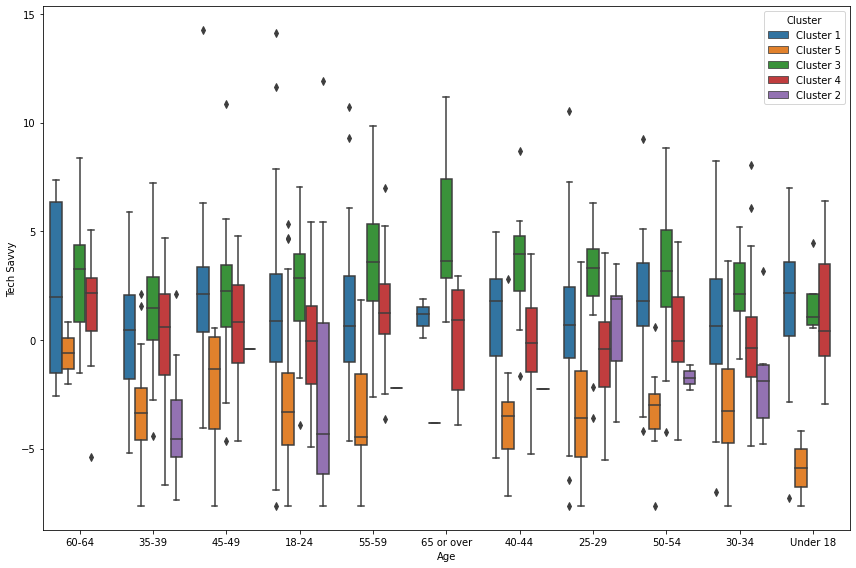

In [202]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y = 'Tech Savvy',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

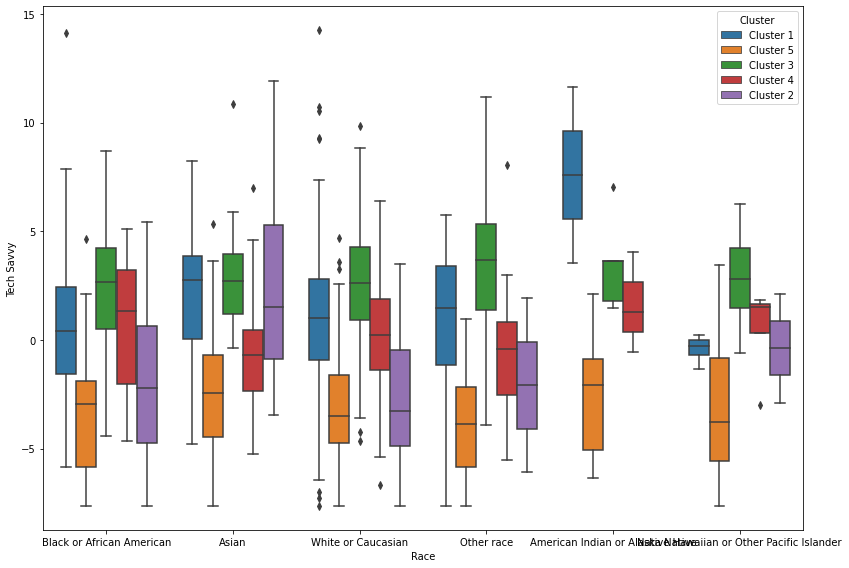

In [203]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Race',
            y = 'Tech Savvy',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Cluster analysis has focused on Native Hawaiian or Other Pacific Islander people, indicating that cluster blue (0) and cluster orange (1) are the most unstable. This could be due to the neighborhood, the location, or the fact that some people do not require apps. They may rely on older technology and systems that were used by their forefathers. Except for these, all other plots show a significant even association.</br>

  The unbalance and shifts in these groups are the result of this. The next group in which we notice a significant shortfall is the elderly. Cluster 5 (orange) is lacking in Group 65 and older, implying that majority will not be using new technology. They aren't impressed by cell phones, and all they want is excellent service. They are likewise on a restricted budget with limited resources.
  
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

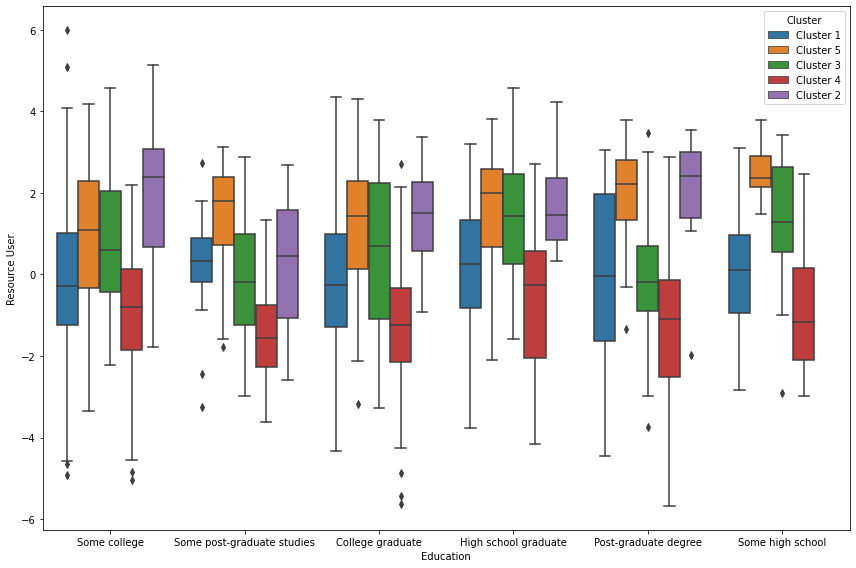

In [204]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Resource User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

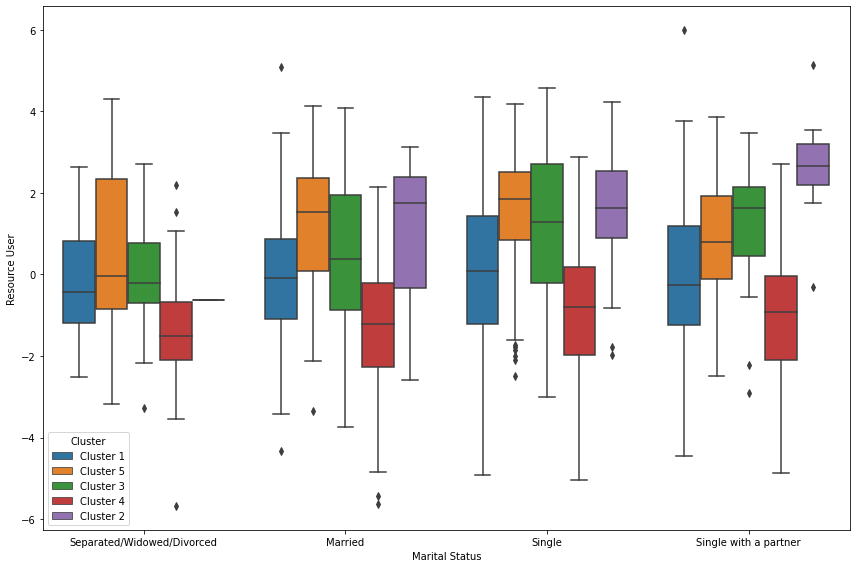

In [205]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y = 'Resource User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

We believed that educating our resource user would result in different outcomes. Individuals with more education would consume more resource information; nevertheless, education had no bearing on which application was downloaded. We saw this balance in married status as well, with plot charts that were consistent across all of our charts. When we looked into the gap, we were surprised to find that several postgraduate studies were low, as were some high school studies.</br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

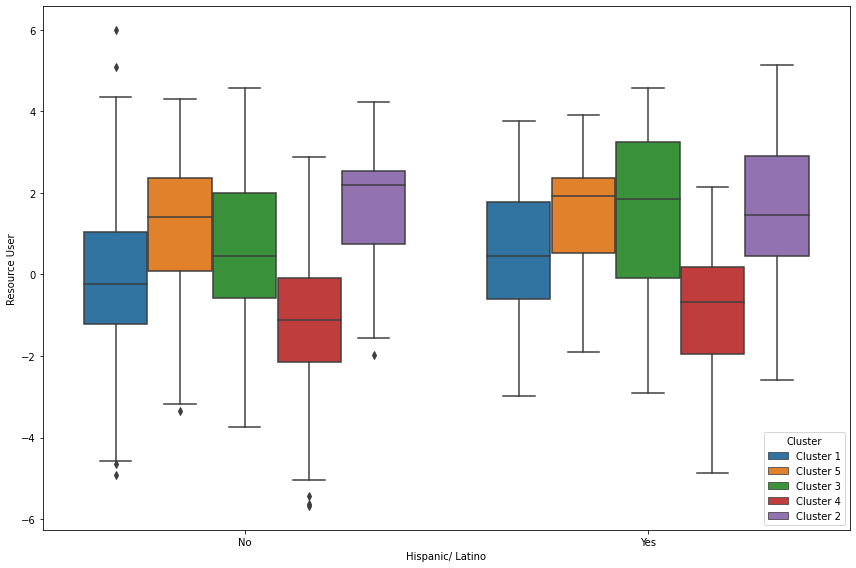

In [206]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Hispanic/ Latino',
            y = 'Resource User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

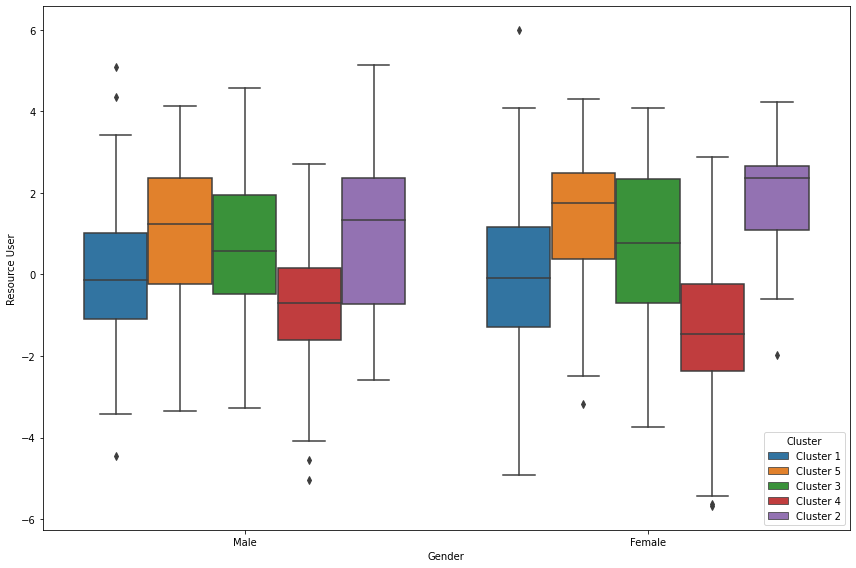

In [207]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Resource User',
            hue = 'Cluster',
            data = final_pca_clust_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Slight changes within cluster 2 (purple) mean in if a person is Hispanic or not. This means we don’t have to put to thought into whether a person is Hispanic or not. Plot charts also show that men and women use applications in roughly equal amounts. Although the median for females in Cluster two is greater than for males, the variable is the same size.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />